### To generate isochrones and save them as .geojson

In [3]:
import requests
import geopandas as gpd
import json

# Constants for Mapbox API
url_base = 'https://api.mapbox.com/isochrone/v1/mapbox/'
lon = -77.034
lat = 38.899
profile = 'cycling'
minutes = "5,10,15"
access_token = 'pk.eyJ1IjoiZWxpYXNnb21leiIsImEiOiJjbGNkbDlpb2kydjl0M290OHIxZ2RwamdrIn0.QkV32DsupzDTqVpWH0OO0w'  # Replace with your Mapbox access token

def get_iso_and_save_json():
    # Build the query URL
    url = f'{url_base}{profile}/{lon},{lat}?contours_minutes={minutes}&polygons=true&access_token={access_token}'
    
    # Perform the GET request
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()

        # Save the data as a GeoJSON file using json module
        geojson_file_path = "/Users/eliasgomez/Library/CloudStorage/OneDrive-Conicet/jupyter/roads/isochrone.geojson"
        with open(geojson_file_path, 'w') as f:
            json.dump(data, f)
        
        return geojson_file_path
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return None

# Call the function and save the GeoJSON file
geojson_file_path = get_iso_and_save_json()
print(f"GeoJSON file saved at: {geojson_file_path}")


GeoJSON file saved at: /Users/eliasgomez/Library/CloudStorage/OneDrive-Conicet/jupyter/roads/isochrone.geojson


### To visualize isochrones with ipyleaflet

In [7]:
from ipyleaflet import Map, GeoJSON
import json

def display_map(geojson_path):
    # Load the GeoJSON file
    with open(geojson_path, 'r') as f:
        data = json.load(f)

    # Create a map centered around the data
    m = Map(center=(lat, lon), zoom=12)

    # Create a GeoJSON layer
    geo_json = GeoJSON(data=data, style={'color': 'blue', 'opacity': 0.5, 'weight': 1.9, 'fillOpacity': 0.3})
    
    # Add the layer to the map
    m.add_layer(geo_json)

    return m

# Replace with the path to your saved GeoJSON file
geojson_file_path = '/Users/eliasgomez/Library/CloudStorage/OneDrive-Conicet/jupyter/roads/isochrone.geojson'
display_map(geojson_file_path)


Map(center=[38.899, -77.034], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

### To visualize isochrones directly from mapbox, with ipyleaflet

Map(center=[38.899, -77.034], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

### To visualize isochrones with diferent colors with ipyleaflet

In [10]:
import requests
from ipyleaflet import Map, GeoJSON
from IPython.display import display

# Constants for Mapbox API
url_base = 'https://api.mapbox.com/isochrone/v1/mapbox/'
lon = -77.034
lat = 38.899
profile = 'cycling'
minutes = "5,10,15"
access_token = 'pk.eyJ1IjoiZWxpYXNnb21leiIsImEiOiJjbGNkbDlpb2kydjl0M290OHIxZ2RwamdrIn0.QkV32DsupzDTqVpWH0OO0w'  # Your Mapbox access token

def get_iso():
    url = f'{url_base}{profile}/{lon},{lat}?contours_minutes={minutes}&polygons=true&access_token={access_token}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch data: {response.status_code}")
        return None

def display_map(geojson_data):
    m = Map(center=(lat, lon), zoom=12)

    # Custom styles for each isochrone
    colors = ['blue', 'green', 'red']
    for feature, color in zip(geojson_data['features'], colors):
        style = {'color': color, 'opacity': 0.5, 'weight': 1.9, 'fillOpacity': 0.3}
        geo_json = GeoJSON(data=feature, style=style)
        m.add_layer(geo_json)

    return m

geojson_data = get_iso()

if geojson_data:
    map_object = display_map(geojson_data)
    display(map_object)
else:
    print("No data available to display.")


Map(center=[38.899, -77.034], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

### Von Thünen model applied to cultural production

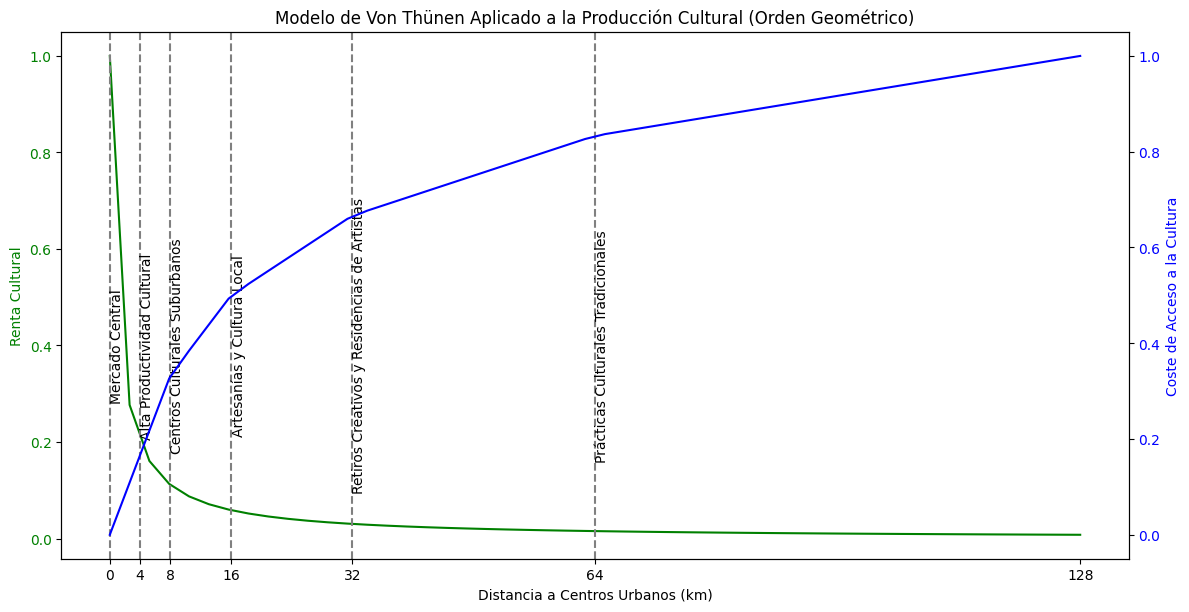

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Rangos de distancia en orden geométrico
distancias_geométricas = [0, 4, 8, 16, 32, 64, 128]

# Datos para el gráfico
distancia_cultural_geométrica = np.linspace(0, 128)  # Distancia a centros urbanos
renta_cultural_geométrica = 1 / (distancia_cultural_geométrica + 1)  # Renta Cultural
coste_acceso_cultura_geométrico = np.interp(distancia_cultural_geométrica, distancias_geométricas, np.linspace(0, 1, len(distancias_geométricas)))

# Etiquetas de las zonas culturales
labels_zonas_culturales = ['Mercado Central', 'Alta Productividad Cultural', 'Centros Culturales Suburbanos', 
                           'Artesanías y Cultura Local', 'Retiros Creativos y Residencias de Artistas', 'Prácticas Culturales Tradicionales']
# Creación del gráfico con un tamaño mayor
fig, ax1 = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño aquí

# Configuración del eje para la renta cultural
ax1.plot(distancia_cultural_geométrica, renta_cultural_geométrica, 'g-')
ax1.set_xlabel('Distancia a Centros Urbanos (km)')
ax1.set_ylabel('Renta Cultural', color='g')
ax1.set_xticks(distancias_geométricas)  # Estableciendo los valores geométricos como marcas del eje x
ax1.tick_params(axis='y', labelcolor='g')

# Configuración del eje para el coste de acceso a la cultura
ax2 = ax1.twinx()
ax2.set_ylabel('Coste de Acceso a la Cultura', color='b')
ax2.plot(distancia_cultural_geométrica, coste_acceso_cultura_geométrico, 'b-')
ax2.tick_params(axis='y', labelcolor='b')

# Colocación de las etiquetas de las zonas culturales y líneas verticales
for i, label in enumerate(labels_zonas_culturales):
    if i < len(distancias_geométricas):
        ax1.axvline(x=distancias_geométricas[i], color='gray', linestyle='--')
        ax1.text(distancias_geométricas[i], 0.4, label, rotation=90, verticalalignment='center', horizontalalignment='left')

fig.tight_layout()
plt.title('Modelo de Von Thünen Aplicado a la Producción Cultural (Orden Geométrico)')
plt.show()


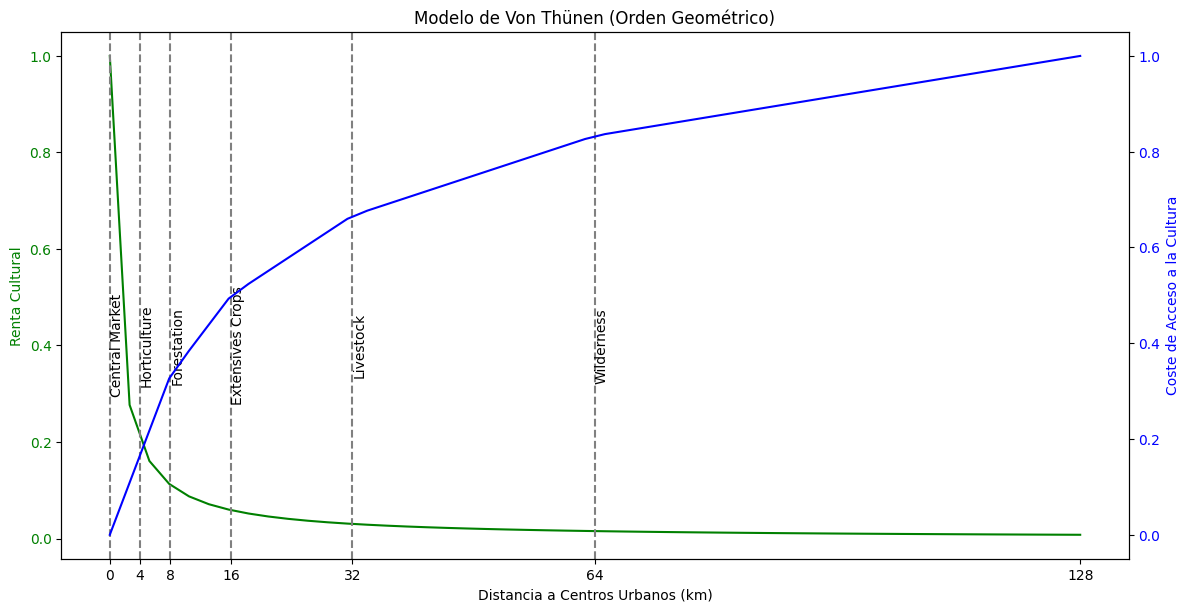

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Rangos de distancia en orden geométrico
distancias_geométricas = [0, 4, 8, 16, 32, 64, 128]

# Datos para el gráfico
distancia_cultural_geométrica = np.linspace(0, 128)  # Distancia a centros urbanos
renta_cultural_geométrica = 1 / (distancia_cultural_geométrica + 1)  # Renta Cultural
coste_acceso_cultura_geométrico = np.interp(distancia_cultural_geométrica, distancias_geométricas, np.linspace(0, 1, len(distancias_geométricas)))

# Etiquetas de las zonas culturales
labels_zonas_culturales = ['Central Market','Horticulture', 'Forestation', 
                           'Extensives Crops', 'Livestock', 'Wilderness']
# Creación del gráfico con un tamaño mayor
fig, ax1 = plt.subplots(figsize=(12, 6))  # Ajusta el tamaño aquí

# Configuración del eje para la renta cultural
ax1.plot(distancia_cultural_geométrica, renta_cultural_geométrica, 'g-')
ax1.set_xlabel('Distancia a Centros Urbanos (km)')
ax1.set_ylabel('Renta Cultural', color='g')
ax1.set_xticks(distancias_geométricas)  # Estableciendo los valores geométricos como marcas del eje x
ax1.tick_params(axis='y', labelcolor='g')

# Configuración del eje para el coste de acceso a la cultura
ax2 = ax1.twinx()
ax2.set_ylabel('Coste de Acceso a la Cultura', color='b')
ax2.plot(distancia_cultural_geométrica, coste_acceso_cultura_geométrico, 'b-')
ax2.tick_params(axis='y', labelcolor='b')

# Colocación de las etiquetas de las zonas culturales y líneas verticales
for i, label in enumerate(labels_zonas_culturales):
    if i < len(distancias_geométricas):
        ax1.axvline(x=distancias_geométricas[i], color='gray', linestyle='--')
        ax1.text(distancias_geométricas[i], 0.4, label, rotation=90, verticalalignment='center', horizontalalignment='left')

fig.tight_layout()
plt.title('Modelo de Von Thünen (Orden Geométrico)')
plt.show()
